# Report: Where to open a Mexican restaurant in the Dallas area?

## The problem:
**As one might imagine, there are tons of Mexican restaurants in and around Dallas.  Successful restauranteurs can have independence, be self-employeed, and become wealthy.  On the other hand, unsuccessful restaurants close every year.  The very large problems of deciding whether to open a restaurant and deciding which type of restaurant to open are the types of problems that potential restauranteurs must face.  However, assuming that one has decided to open a Mexican restaurant in Dallas, there are number of decisions to make, including restaurant concept, menu choices, and location, among others.  This report focuses on the decision of where to locate a new Mexican restaurant in or around Dallas and attempts to answer the question using a K-means model to address this problem.**

## The target audience:

**The target audience for this report is anyone who has decided to open a Mexican restuarant in Dallas and now wants to decide where to do so.**

## The data:
**In exploring this problem I attempted to use location data from a number of different sources on the web.  When I began exploring this problem, I started by using zip codes.  The reason that zip codes were appealling is that they seemed to generic markers of location.  However, after several attempts to use zip codes, I found that zip codes are much more heterogeneous than one might guess at first.  For example, one entire zip codes may belong to one building owned by one corporation.  This type of zip code is not on par with a zip code representing a residential neighborhood.  Also, some zip codes are completely bereft of venues, being in composed entirely of industrial areas, etc.  While it was possible to trim and wrangle such lists, in the end I turned to using the neighborhood as the fundamental unit of the analysis and deteremined that data exists that is already formatted on kaggle.  Thus the data consists of 118 Dallas neighborhoods.  The neighborhoods do not strictly fall into the official city of Dallas, and so data includes neighborhoods from for example the Addison area and outlying suburbs.  Nor is the data all inclusive.  According to wikipedia there are many more neighborhoods in Dallas than 118.  However, as you will see in the methodology section, the algorithm used benefits from having neighborhoods that are spread out from each other.  So, this 118-member data set is best thought of as a representative sample of the most well-known neighborhoods in the Dallas and surrounding area.  The downloaded data includes the latitude and longitude coordinates.  However, since we are attempting to show the use of hte Python geocoder, we drop the coordinates and grab new updated coordinate data using the geocoder.  I would like to attribute gathering and formatting of the data to Kaggle user Mr. Christopher.  The exact source of the data is the web address:**  https://www.kaggle.com/mrchristolpher/dallas-texas-neighborhoods-lat-long 

## Methodology:

**The python geocoder was used to add coordinate information to the neighborhood names an full neighborhood addresses.  Data exploration was done by putting the latitude and longitude information in python arrays and using matplotlib to produce box plots, histograms and a scatter plot to better understand the positions and distribution of the data.  A folium map was created showing the neighborhood locations in and around Dallas.**

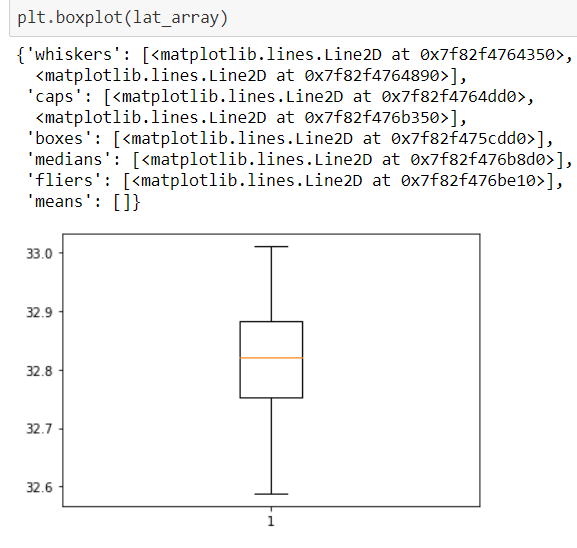
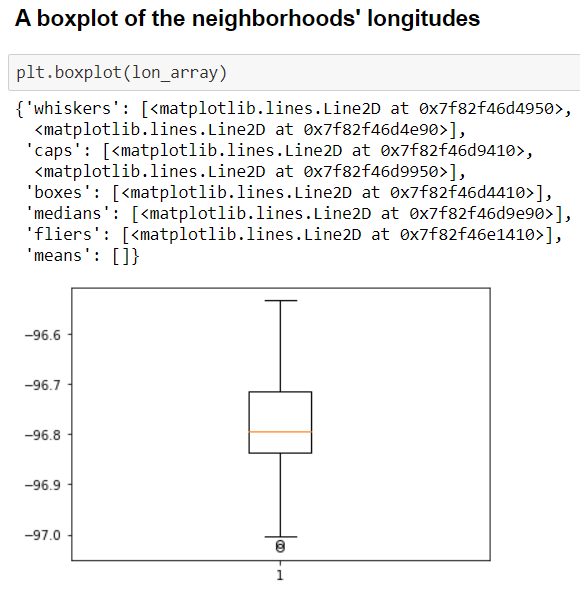
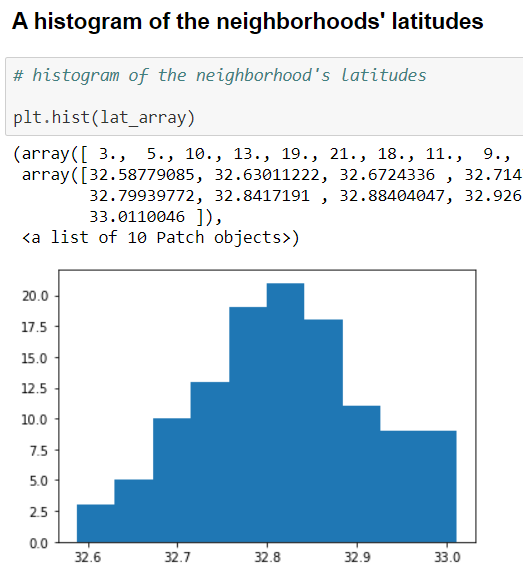
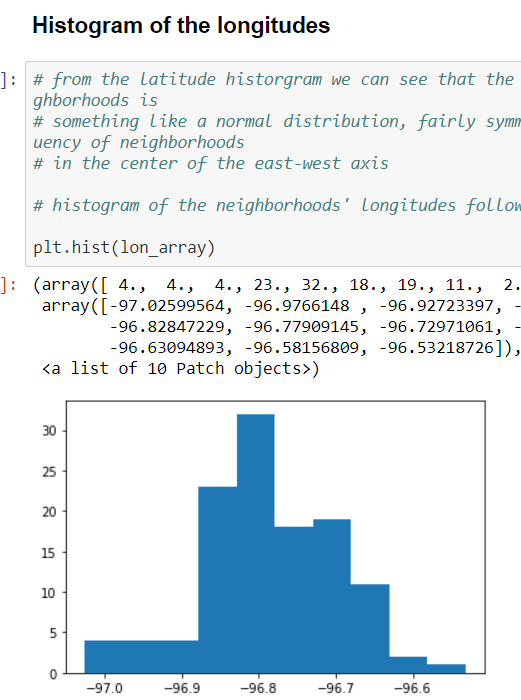
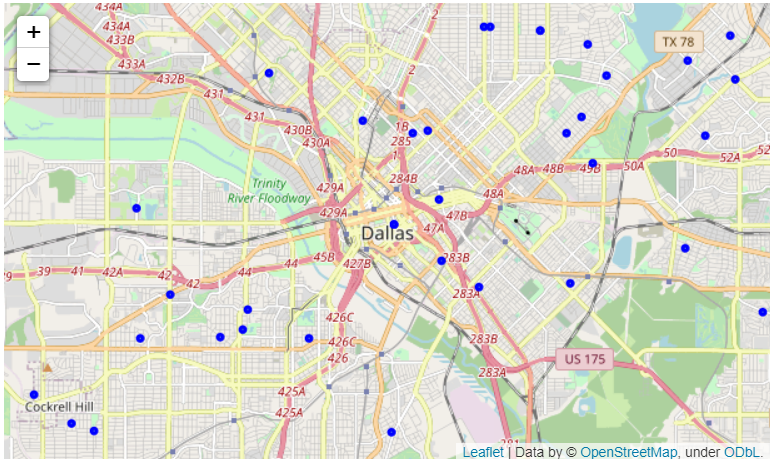

**Next, in a step that is not reflected in the project notebook, we created an account and an app on the Foursquare website, and we used Foursquare credentials for that account to obtain a JSON file containing a list of the venues within 1,500 meters of each neighborhood coordinate.  The entire analysis was done several times, each time changing the radius around the neighborhood coordinates used.  The 1500 radius was the one that produce the best results, so that was decided through trial and error.  For anyone looking to performa a similar analysis, this is a parameter that I recommend should be given a lot of thought.  Some cities in the Eastern U.S. and Europe, have smaller areas that are defined as "neighborhoods", whereas Dallas is a very dispered metropolitan area.  This choice of the 1500 meters also ties in with the decision to not try to map every single neighborhood in Dallas but instead to use a representative sample.  If someone decided to do the analysis and use every neighborhood, then it might be advisable to change this setting to 500 rather than 1,500.  It should also be noted and acknowledge than many of the functions I used in downloading and organizing the JSON data are resused python functions from the course labs.  I want to make sure I give that acknowledgement.**

**Next a dataframe was defined that included one row for every venue category within each neighborhood, and that dataframe also included the neighborhood coordinates as well as the venue coordinates of each venue.  Now Foursquare defines certain queries that you can run each day, and has limits for each level of queries, and in addition to that, Foursquare can sometimes be a little bit temperamental and/or technically glitchy.  So every time the JSON file was downloaded, it needed to be saved locally in case that was the last query that could be downloaded that day.**

**The next step was to explore the downloaded venue information.  It was necessary to define the maximum number of venues that should be returned from any one neighborhood at 100.  Quite often that limit was reached, maybe in 10 to 15 of the neighborhoods more venues existed than 100, so the limit was useful in order to not be overwhelmed with data.  Based on this download and exploring the data, it was determined that 299 unique venue categories exist in these neighborhoods.  So the next step was to use one-hot encoding to create a dataframe with the venue categories as columns, and the neighborhoods are listed non-uniquely as rows.  This dataframe was 6418 x 300.  Next we took the mean of each venue occurance across each neighborhood and grouped by neighborhood.**

**Skipping a few of the more tedious details, this allowed us to perform the K-means clustering algorithm on the data based on each neighborhood's top 10 most common venue categories.  This resulted in 5 distinct clusters.  The clusters are indicated and color-coded on the map.  A description of the clusters and their use in answer the business problem follows in the discussion section.**

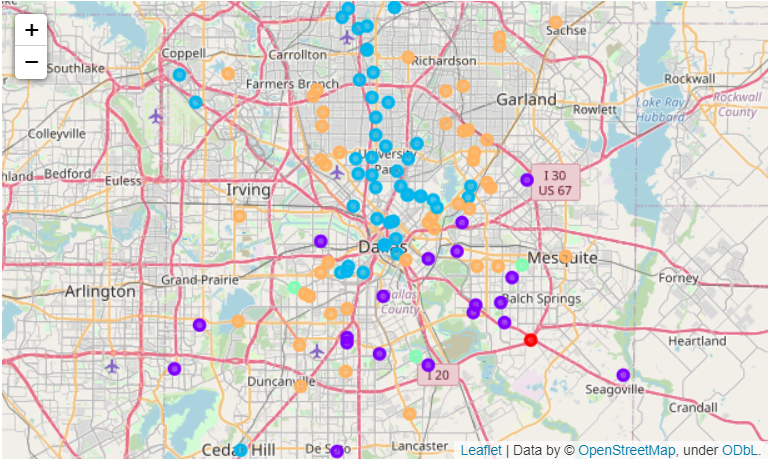

**Now based on the analysis of these clusters (done in the section below) it is possible to supply an answer to the business problem and conclude the report.  However, a second K-means model was performed using dimensionality reduction using Apach spark.  See the discussion section for the reasons for this.  Dimensionality reduction was done using Principal Component Analysis (PCA)  The data was transformed into a single dimension of data using the pyspark library and a K-means model was run on the single dimension of data.  The clusters created using Spark were relabeled to reflect their similarity to the clusters in the previous K-Means Model and again plotted to the Dallas folium map, and color coded to reflect their similar clusters in the previous analysis:**

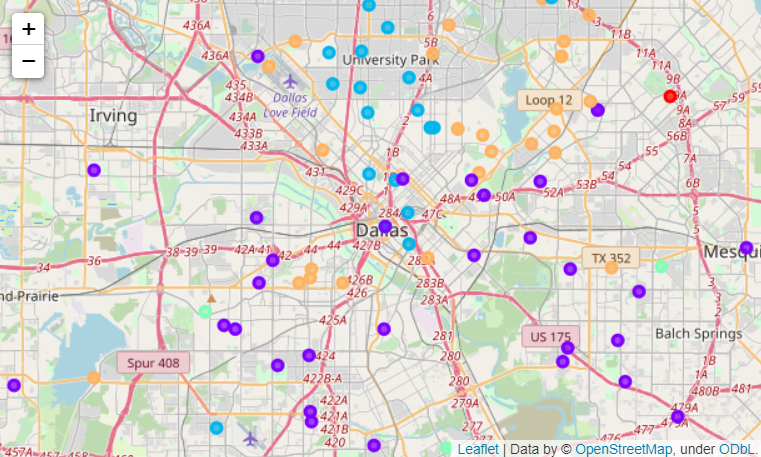

**The difference reflects information loss.  Finally, diminsionality reduction was performed on the original dataset to reduce the dimensions to 3 dimensions, and the original data set was plotted in 3 dimensions.  The clustering analysis on the 3d data set and color-coded plotting of the 3d data set was left as an open project for a later date, since this analysis arleady went beyond answering the original business question.**

## Discussion

**As noted above, there were three main parts of the data analysis:
    1.  K-means model on the original data in all its dimensions.
    2.  K-means on data in 1 dimension with information loss
    3.  PCA performed to reduct the origina data to 3 dimensions (clustering algorithm, not performed, would also include some information loss)**
    
### Discussion of Part 1

**The K-Means model on the orignal data resulted in 5 clusters.  Note that the clusters achieved are not in two or three dimensions but are in the number of dimensions of the dataframe used for the analysis.  So when you look at the map you do not really see the clusters achieved by the algorithm.  To do that, you would need to transform the data to 3d, so K-means on that data, and then plot it.  That said, the clusters and their implications on the business question turned out as follows:**

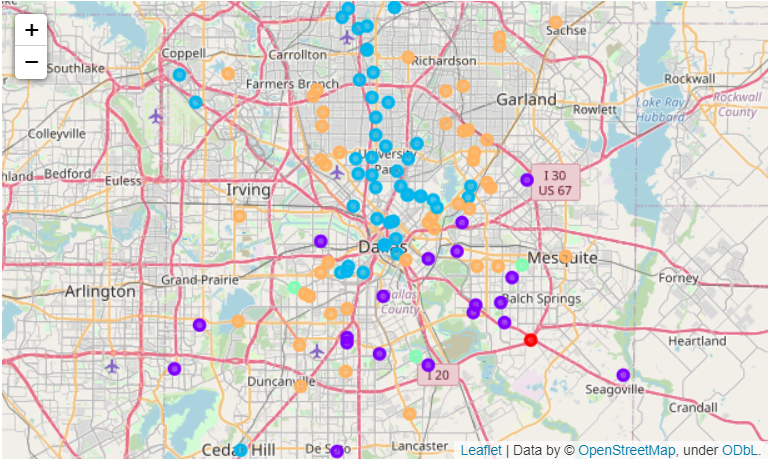


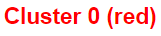
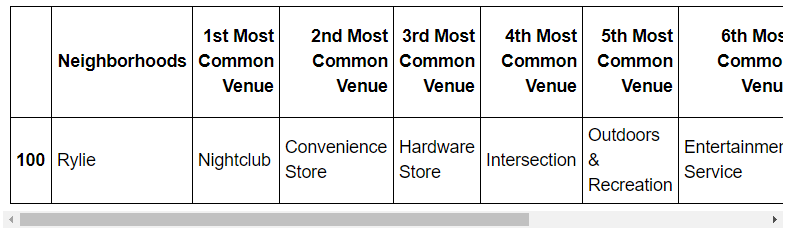

**Cluster 0 contains only one neighborhood. The top 10 venue categories do not contain restaurants. The 7th most common venue is a dive bar and the 9th most common venue is a donut shop. Dining options seem limited. The most common venue category is night club. The data of this neighborhood puts it in a class of its own. Maybe a Mexican restaurant in this neighborhood could work. The owners may want to be open to staying open late on weekends to accomodate a late night crowd.**

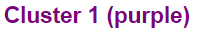
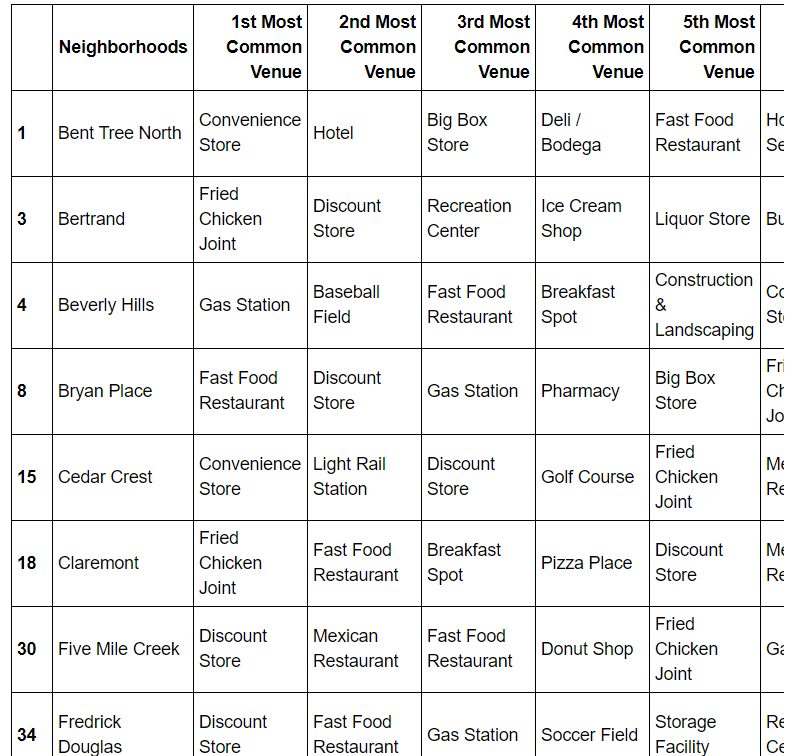

**Cluster 1 contains 19 neighborhoods which are shown as purple on the map. This cluster includes most of the south side of Dallas. The model has determined the similarity of the data denoting the most common venues in these neighborhoods. The model has grouped together a number of neighborhoods which in Dallas are traditionally seen as being lower income neighborhoods. While this information did not come from the model, this is a consideration for a potential restauranteur, and the model did group these neighborhoods together based on the similarity in their venue data. This grouping is interesting for a number of reasons: 1.) Mexican restaurants are the most common venue in only 1 of the neighborhoods: Kingsbridge Crossing. However, Mexican restaurants and Tex-Mex restaurants are the 2nd most common venue in 5 of the neighborhoods. This may indicate an opportunity to open a Mexican restaurant in neighborhoods within the cluster where Mexican restaurants are not in the top 4 most common venues. However, this cluster requires a lot of careful business analysis for the potential restauranteur.**

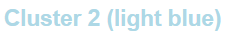
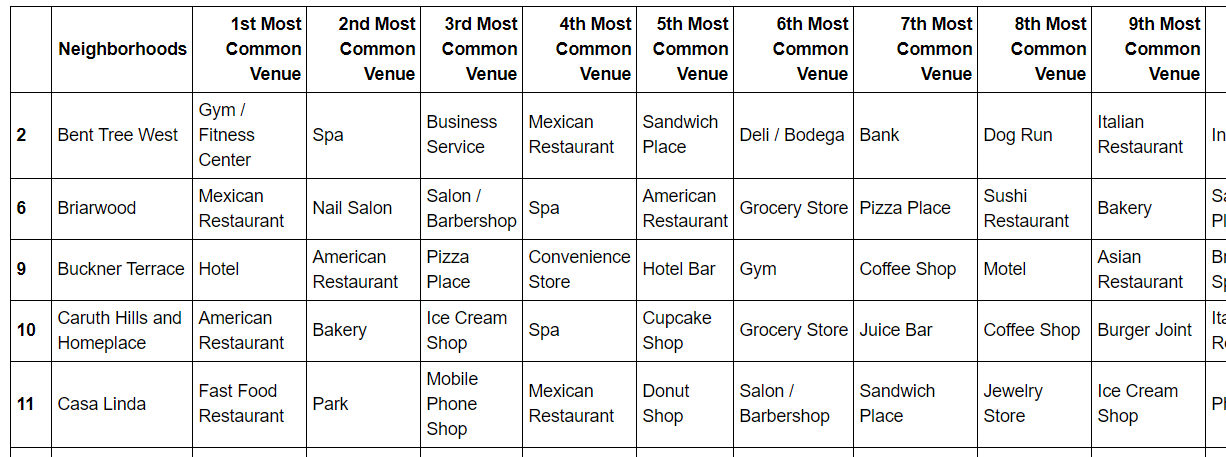

**Cluster 2, shown in blue on the map, contains more neighborhoods than any other cluster. This cluster includes the affluent neighborhoods which tend to be on the east and west side of the Dallas North Tollway, which runs north out of downtown Dallas. These are high income neighborhoods, so that is a consideration for a potential restauranteur. It also means that property values and therefore rent for a restaurant is probably higher in this area. The above considerations are not implied by the model, but instead are "subject matter knowledge" from a person performing the analysis, who is a Dallas resident. However, it is interesting that the model has grouped these neighborhoods together, along with the neighborhood of the areas known as downtown Dallas and uptown Dallas, in the same cluster. There are about 50 neighborhoods in this cluster. Mexican restaurants are the most common venue in 9 out of the 50 neighborhoods. In addition, restaurants in general are the most common venue in 20 out of 50 of the neighborhoods (this last number includes burger joints and fast food). That only includes the most common venue column. If one includes the 1st through 4th most common venues, then there are a ton of restaurants, bars, and places to eat in this cluster. The potential restauranteur wishing to open a Mexican restaurant in this cluster should really have a very clear concept of the differentiating factor that will set their restaurant apart and make it special, since the competition is fierce.**

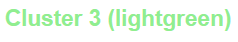

**Cluster 3 is denoted in light green and contains 3 neighborhoods. There are very few restaurants in the 10 most common venues in these neighborhoods. The most common venues here are discount stores and convenience stores. Perhaps a Mexican restaurant could work here? More research is needed into why restaurants do not seem to be opening in these neighborhoods.**



**Cluster 4 contains 45 neighborhoods. Mexican restaurants are the most common venue in a whopping 15 out of 45 neighborhoods. In addition to that, if one includes fast food, then restaurants are the most common venue in 30 out of 45 neighborhoods, and we have only look at the most common venue so far. If you include neighborhoods where restaurants are one of the 1st through 4th most common venues, then you can see that this cluster is absolutely soaked with restaurants. This cluster's data implies that this cluster on the whole is the most competitive when it comes to the prospect of opening A.) any type of restaurant, and B.) a Mexican restaurant in particular. Note that since the clusters are numbere from 0 to 4, this is the 5th and last cluster determined by the K-Means model.**

**The following is a simplified description of how the the K-means model works.**

**First, k centroids are chosen randomly. In the example above k = 5. The algorithm then matches each data point to the closest centroid. Next, the 5 centroids are moved to the center of their respective clusters. Next, the datapoints are reassigned to the closest centroid, based on the new locations of the centroids. This process is repeated until the amount that the centoids move on each iteration is very small. Since this is the algorithm, the number of centroids, and therefore the number of clusters, must be chosen in advance. However, since this operation is taking place in space that has greater than 3 dimensions, the visualization of the result would be hard to understand and therefore not meaningful. However, it is possible to reduce the dimensionality of that data so that the data is represented in 3 dimensions. This is done using Principal Component Analysis.**

### Discussion of Part 2

#### How Principal Component Analysis (PCA) works

**Principal component analysis finds the direction within the data that preserves the most variance between the data points when projecting the data from a higher dimension to a lower dimension. In doing so, some of the information contained in the higher dimension data set is lost when projecting the data onto a lower dimension data set. However the amount of information loss can be quantified, and the agorithm chooses the direction of the projection so as to minimize information loss.¶**

#### How PCA was applied

**PCA was applied to the data set first, then K-Means was run on the one-dimensional data.  There was some information loss, as can be seen in the resulting map and comparing it to the map in Part 1:**

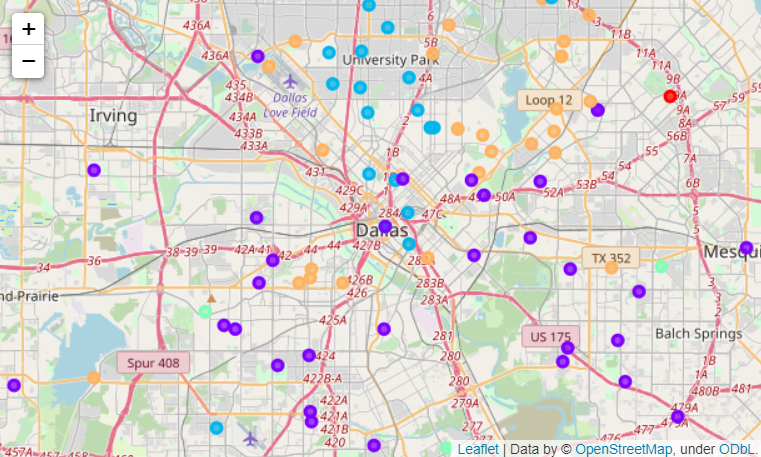

**The exact same type of analysis can be used here as in Part 1 when examining each of the resulting clusters.  It should be noted that the clusters formed were very similar to those formed in the analysis used in Part 1, so it is 
pretty easy to see how one could analyze each cluster in the same way we did using the multidimensional K-means analysis above. The first analysis contains no information loss whereas the second analysis does contain information loss due to dimensionality reduction to one dimension.**

### Discussion of Part 3

**In Part 3, PCA was used to reduce the dimensions of the data to 3d rather than one dimension, as in Part 2.  The following image shows a three-dimensional representation of the original data.**

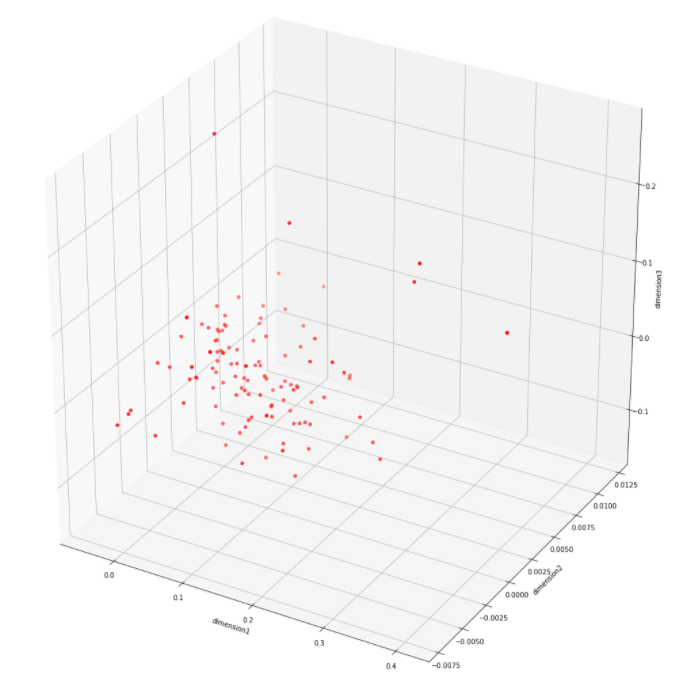

**There is some data loss involved in transforming the higher dimension data to three dimensions. One idea to take this proejct further would be to run K-means on the three-dimensional representation of the origina data and then color code the clusters in three-dimensions. Then, plot the data points on the folium map to compare the original data, the data loss that occurred on the conversion to three dimensions , and the data loss that occured when converting to 1 dimension (as shown in Part 2). The data loss should be progressively greater in each case. There is a lot that can be done with the data, but this project has already gone beyond the original intent, which was to answer the business problem using K-means (achieved in Part 1).**

## Conclusion

**In this analysis, in Part 1 I used the unsupervised method K-Means on multidimensional data to uncover similarity in the neighborhood venue data using 5 clusters.  As a result of that process, I was able to draw some conclusions about each of the clusters and apply those insights to the decision of where to locate a Mexican restaurant in or around Dallas.  In Part 2, I performed a variation of what was done in Part 1, but first reducing the dimensionality of the data using PCA to one dimension.  This highlighted that fact that with dimensionality reduction, while some information loss occurs, we can expect similar results.  In Part 3, I changed the data's dimensions to 3, which allowed us to visualize a transformation of the orignal data in 3 dimensions.  I noted that what was started in Part 3 could be extended by running a clustering method like K-Means on the data and then plotting the clusters in different colors in three dimensions.  The advantage of the method started in Part three is 1.) there is less information loss than in Part 2 and 2.) the data would be able to be visualized.**

### [End of Report]

---